In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

%matplotlib inline

In [2]:
df=pd.read_csv('kc_housing_data_location_and_high_correlation.csv')
df.head()

,price,is_cust_build,grade,view,waterfront,lat,long,zipcode,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above,date,has_basement,years_since_renovated
0,221900.0,0,7,0.0,0.0,47.5112,-122.257,98178,1180,3,1.00,1.0,1340,1180,10/13/2014,0,0.0
1,538000.0,0,7,0.0,0.0,47.7210,-122.319,98125,2570,3,2.25,2.0,1690,2170,12/9/2014,1,29.0
2,180000.0,0,6,0.0,0.0,47.7379,-122.233,98028,770,2,1.00,1.0,2720,770,2/25/2015,0,0.0
3,604000.0,0,7,0.0,0.0,47.5208,-122.393,98136,1960,4,3.00,1.0,1360,1050,12/9/2014,1,0.0
4,510000.0,0,8,0.0,0.0,47.6168,-122.045,98074,1680,3,2.00,1.0,1800,1680,2/18/2015,0,0.0


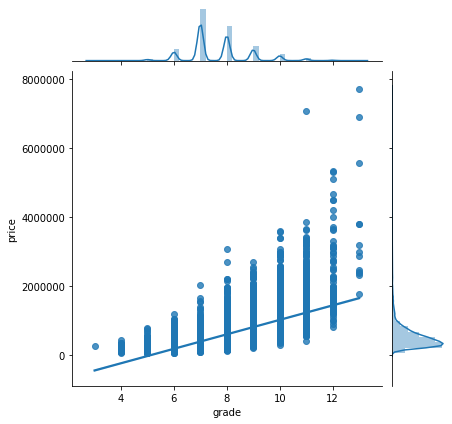

In [3]:
sns.jointplot('grade','price', data=df, kind='reg');

# Price Vs Columns

In [4]:
df_grade = df.drop(columns=['lat','long', 'zipcode','date'])

subset = df_grade.drop(columns=['price'])
df_grade.head()

,price,is_cust_build,grade,view,waterfront,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above,has_basement,years_since_renovated
0,221900.0,0,7,0.0,0.0,1180,3,1.00,1.0,1340,1180,0,0.0
1,538000.0,0,7,0.0,0.0,2570,3,2.25,2.0,1690,2170,1,29.0
2,180000.0,0,6,0.0,0.0,770,2,1.00,1.0,2720,770,0,0.0
3,604000.0,0,7,0.0,0.0,1960,4,3.00,1.0,1360,1050,1,0.0
4,510000.0,0,8,0.0,0.0,1680,3,2.00,1.0,1800,1680,0,0.0


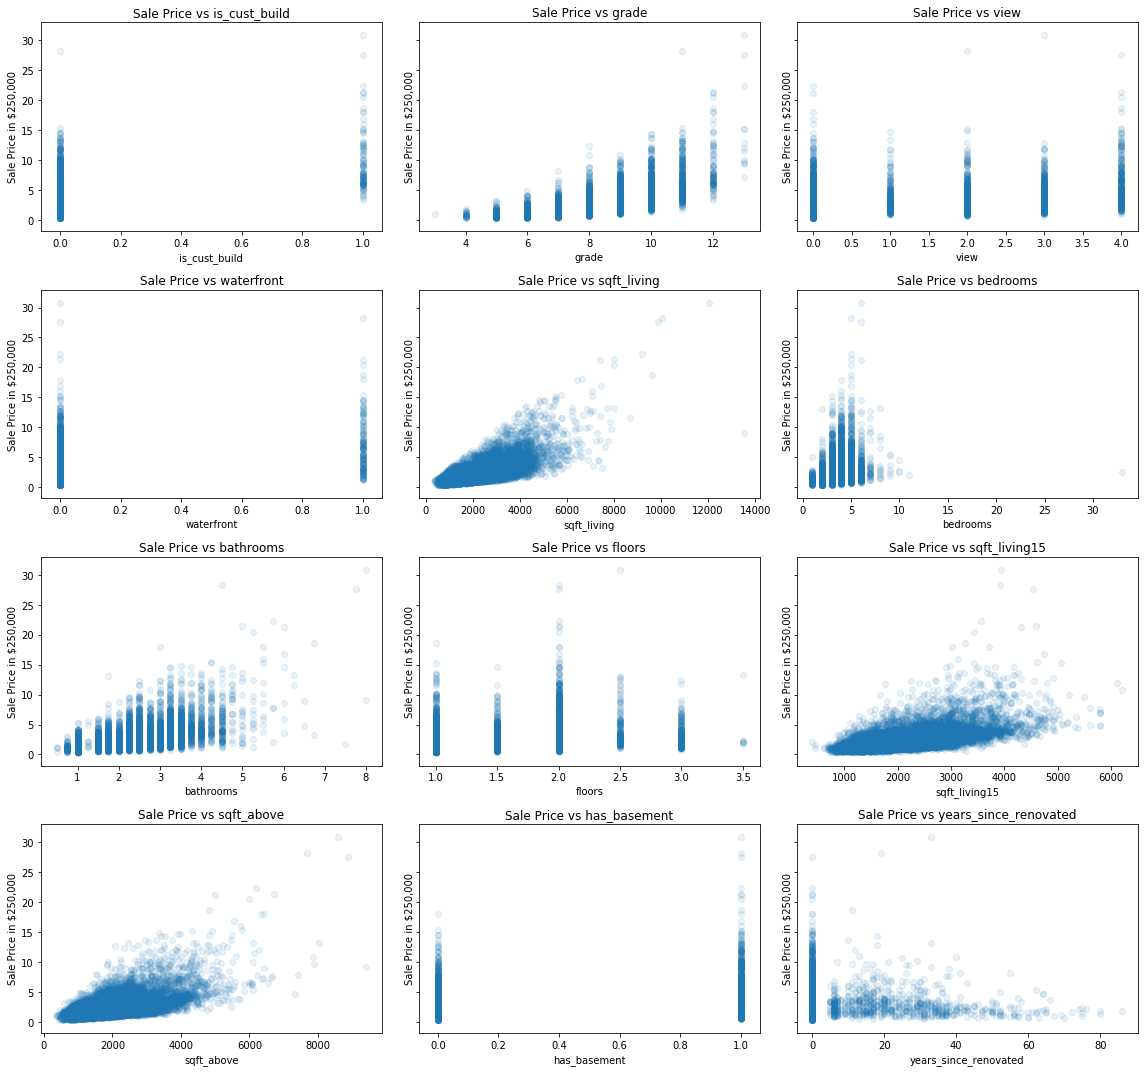

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), subset.columns):
    ax.scatter(subset[column], df_grade['price'] / 250_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $250,000')

fig.tight_layout()

# Grade vs Columns

In [6]:
subset2 = df_grade.drop(columns=['grade'])

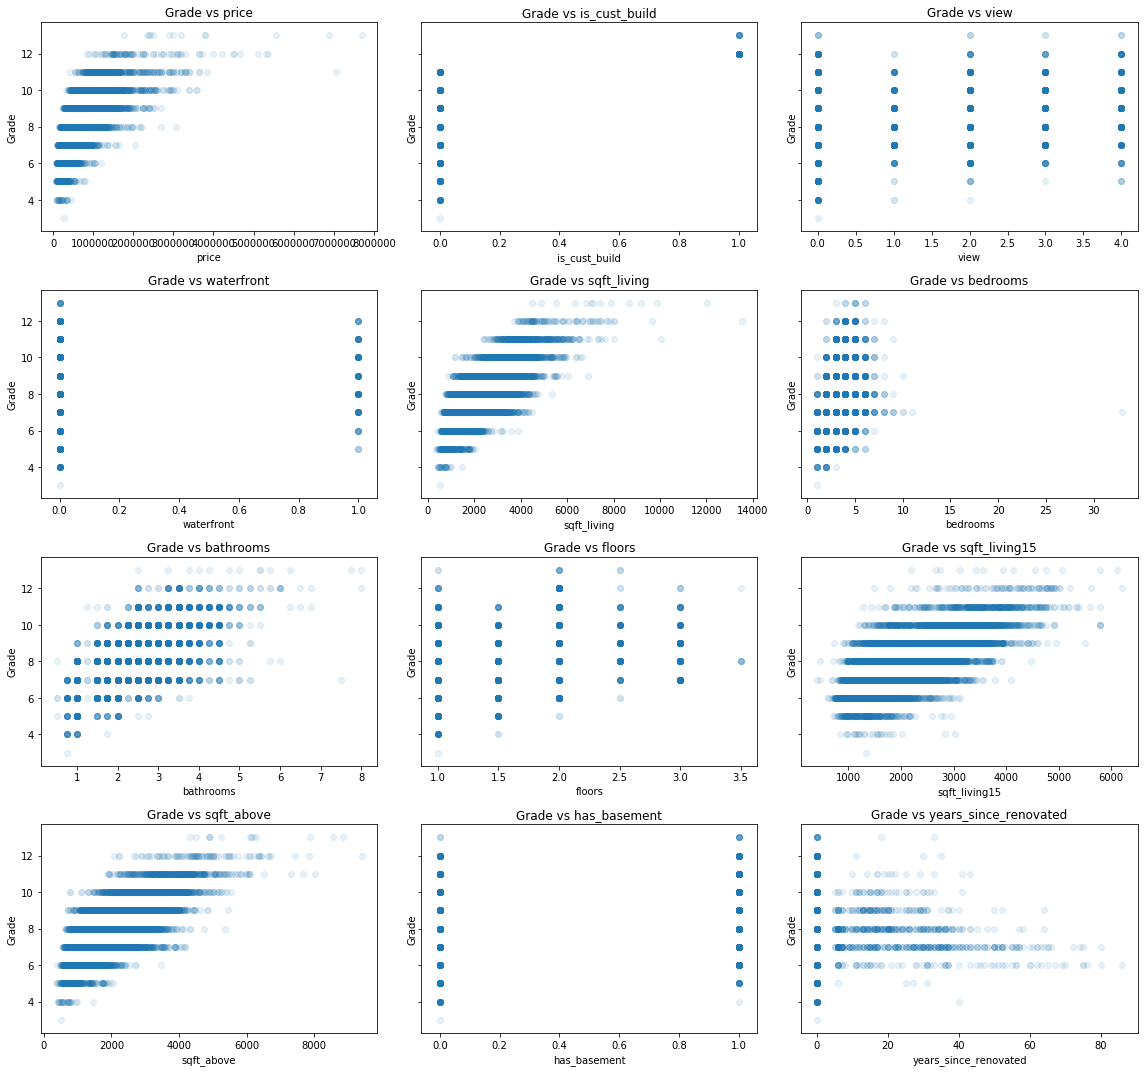

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), subset2.columns):
    ax.scatter(subset2[column], df_grade['grade'], label=column, alpha=.1)
    ax.set_title(f'Grade vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Grade')

fig.tight_layout()

df = df.drop(columns=['id'])
df.condition.value_counts(),sort_index().plot('bar')
df.groupby('condition').agg('std')['price']
df['condition3'] = df.condition.apply(lambda x: 1 if x >=3 else 0)

res = statsmodels.stats.multicomp.pairwise_tukeyhsd(df['price'], df['condition']) (29:30)

ols = sm.OLS(df['price'], df['condition'])
res = ols.fit()
res.summary()

sns.lmplot(x='condition', y='price', data=df, scatter_kws={"alpha":0.3})
plt.scatter(x=np.arange(1,6), y=np.arange(1,6)*151400(coef)*, c='r')
plt.show()

df_cat = pd.get_dummies(df, columns=['condition'], drop_first=True)
df_cat


kurtosis check fisher = True??? near 0

# Removing Grade & Price outliers

- Keep:
    * Grades: 6-10
    * Price: <2 mil

In [8]:
df_grade = df_grade.loc[df_grade['grade'] <11]

In [9]:
df_grade = df_grade.loc[df_grade['price'] <2_000_000]
df_grade = df_grade.loc[df_grade['grade'] >5]
df_grade.head() 

,price,is_cust_build,grade,view,waterfront,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above,has_basement,years_since_renovated
0,221900.0,0,7,0.0,0.0,1180,3,1.00,1.0,1340,1180,0,0.0
1,538000.0,0,7,0.0,0.0,2570,3,2.25,2.0,1690,2170,1,29.0
2,180000.0,0,6,0.0,0.0,770,2,1.00,1.0,2720,770,0,0.0
3,604000.0,0,7,0.0,0.0,1960,4,3.00,1.0,1360,1050,1,0.0
4,510000.0,0,8,0.0,0.0,1680,3,2.00,1.0,1800,1680,0,0.0


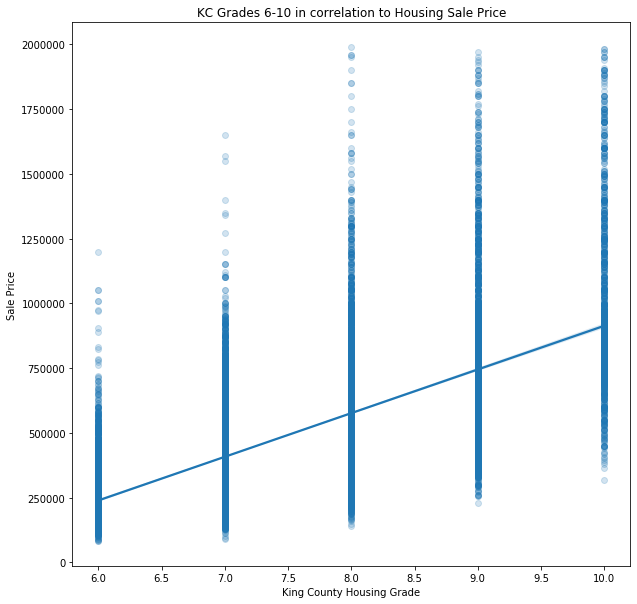

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('KC Grades 6-10 in correlation to Housing Sale Price')
plt.xlabel('King County Housing Grade')
plt.ylabel('Sale Price')

sns.jointplot('grade','price', ax=ax, data=df_grade, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});


plt.close(2)